In [2]:
# Importing Libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
df = pd.read_csv(r"C:\Users\DELL\Desktop\70K Data Analysis\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


In [4]:
df_DA_US['salary_year_avg'].sample(10)

140403     55500.0
202251    125000.0
439772    100000.0
380687     65000.0
447973     67500.0
569551     78390.0
526074     80000.0
771028     98800.0
174693    150000.0
172883     82500.0
Name: salary_year_avg, dtype: float64

<Axes: >

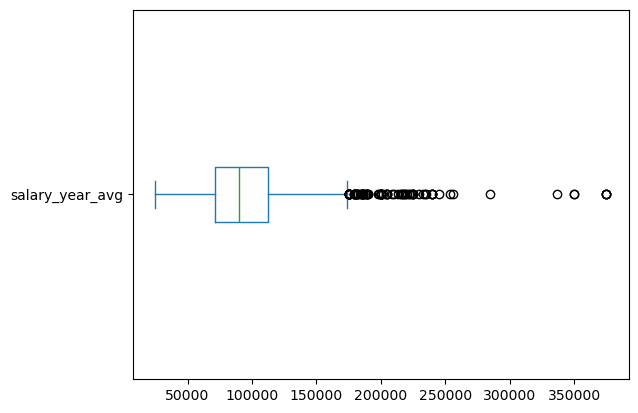

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7340\3708513646.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


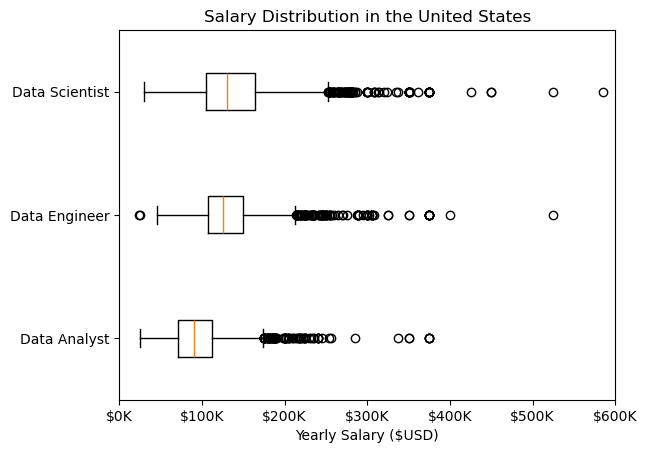

In [7]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg']for job_title in job_titles]


plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()